<a href="https://colab.research.google.com/github/Yudai-0310/learn_nn/blob/main/mnist_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNISTをNNとCNNで解く
- ref
    - [MNISTをKerasでやってみる（普通のNNとCNN）](https://shirakonotempura.hatenablog.com/entry/2018/12/25/030242)

- load packages
    - Kerasでやってみる

In [ ]:
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

from tensorflow.keras import utils as np_utils

- load data
    - MNISTのデータをload
        - 10クラス分類

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


- trainとtestの形状を確認
    - trainデータは28 * 28の画像が60000枚
    - testデータは28 * 28の画像が10000枚

In [ ]:
print("x_train")
print(x_train.shape)
print("y_train")
print(y_train.shape)
print("x_test")
print(x_test.shape)
print("y_test")
print(y_test.shape)

x_train
(60000, 28, 28)
y_train
(60000,)
x_test
(10000, 28, 28)
y_test
(10000,)


- 試しに1枚見てみる

In [ ]:
x_train[0].shape

(28, 28)

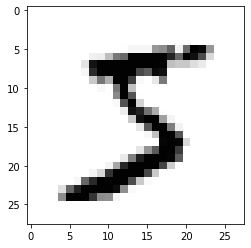

In [ ]:
plt.imshow(x_train[0], cmap='Greys')
plt.show()

- reshape
    - (画像の枚数, 縦の長さ, 横の長さ)の3次元のデータを(画像の枚数, 縦の長さ, 横の長さ, チャネル数)の4次元にreshape
        - MNISTの画像は、上の画像を見てもわかるが白黒画像なのでチャネル数は「1」
    - ピクセル値を正規化
        - ピクセル値は0（完全な白）から255（完全な黒）までの値をとるので、255で割ることで0~1に収まる数値に正規化できる
    - NNでは2次元の画像を1次元化してから使うので1次元化しておく（縦に伸ばして縦ベクトルにする感じ）
        - 28 * 28 = 784
        - CNNでは2次元のまま扱える
    - 目的変数はone-hotベクトルにしておく

In [ ]:
# 3次元のデータを4次元にreshape
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# ピクセル値を正規化
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# NNに使う用に、1次元化
x_train_nn = x_train.reshape(x_train.shape[0], 784)
x_test_nn = x_test.reshape(x_test.shape[0], 784)

# 目的変数はone-hotベクトルに変換
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [ ]:
print("x_train")
print(x_train.shape)
print("y_train")
print(y_train.shape)
print("x_train_nn")
print(x_train_nn.shape)
print("x_test")
print(x_test.shape)
print("y_test")
print(y_test.shape)

x_train
(60000, 28, 28, 1)
y_train
(60000, 10)
x_train_nn
(60000, 784)
x_test
(10000, 28, 28, 1)
y_test
(10000, 10)


## NN

- NNのモデルを組む
    - 多層パーセプトロン（といっても2層だが）
        - 全結合層1層目:ニューロン数は50
        - 全結合層2層目:ニューロン数は50
        - 出力層:ニューロン数は10（10クラス分類だから）
    - 学習に関する設定
        - 損失関数：交差エントロピー（MSEでもいいけど、交差エントロピーの方が確率的勾配降下法の際に計算が楽っぽい）
        - 最適化手法：Adam
        - 評価関数：正解率

In [ ]:
model_nn = Sequential()
model_nn.add(Dense(50, activation="relu", input_dim=784)) # ニューロン数は50
model_nn.add(Dropout(0.5))
model_nn.add(Dense(50, activation="relu")) # ニューロン数は50
model_nn.add(Dropout(0.5))
model_nn.add(Dense(10, activation='softmax')) # ニューロン数は10

In [ ]:
model_nn.compile(
    loss="categorical_crossentropy", # 損失関数（目的関数）
    optimizer="Adam", # 最適化手法
    metrics=['accuracy'] # 評価関数（学習には関係ない）
)

- モデルの構造を確認
    - パラメータの数は、合計で 39250個 + 2550個 + 510個 = 42310個
        - 1層目は、 ( 784 + 1 ) 個のニューロンと50個のニューロンの全結合だから、 ( 784 + 1 ) * 50 = 39250個
            - +1はバイアスのニューロン
        - 2層目は、 ( 50 + 1 ) 個のニューロンと50個のニューロンの全結合だから、 ( 50 + 1 ) * 50 = 2550個
            - +1はバイアスのニューロン
        - 出力層は、 ( 50 + 1 ) 個のニューロンと10個のニューロンの全結合だから、 ( 50 + 1 ) * 10 = 510個
            - +1はバイアスのニューロン

In [ ]:
print(model_nn.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                39250     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________
None


- 学習（42310個のパラメータの推定）
    - エポック数は100
    - バッチサイズは128
    - trainを train:valid=0.8:0.2 に分割

In [ ]:
%%time

epochs = 100

model_nn_fit = model_nn.fit(x_train_nn, y_train,
                    batch_size=128,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 4s 5ms/step - loss: 1.1396 - accuracy: 0.6167 - val_loss: 0.3606 - val_accuracy: 0.9033
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 0.6287 - accuracy: 0.8111 - val_loss: 0.2735 - val_accuracy: 0.9242
Epoch 3/100
375/375 [==============================] - 2s 4ms/step - loss: 0.5335 - accuracy: 0.8421 - val_loss: 0.2408 - val_accuracy: 0.9332
Epoch 4/100
375/375 [==============================] - 2s 4ms/step - loss: 0.4861 - accuracy: 0.8574 - val_loss: 0.2270 - val_accuracy: 0.9351
Epoch 5/100
375/375 [==============================] - 2s 4ms/step - loss: 0.4578 - accuracy: 0.8671 - val_loss: 0.2193 - val_accuracy: 0.9402
Epoch 6/100
375/375 [==============================] - 2s 5ms/step - loss: 0.4350 - accuracy: 0.8728 - val_loss: 0.2070 - val_accuracy: 0.9435
Epoch 7/100
375/375 [==============================] - 2s 5ms/step - loss: 0.4196 - accuracy: 0.8797 - val_loss: 0.1943 - val_accuracy: 0.9459

- testの予測とtestの予測精度を表示

In [ ]:
score_nn = model_nn.evaluate(x_test_nn, y_test, verbose=1, batch_size=128)
print('Test loss:', score_nn[0])
print('Test accuracy:', score_nn[1])

79/79 [==============================] - 0s 3ms/step - loss: 0.1889 - accuracy: 0.9560
Test loss: 0.18889418244361877
Test accuracy: 0.9559999704360962


- accuracyの上がり方を表示

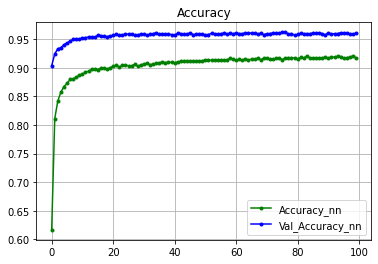

In [ ]:
plt.figure()

plt.plot(model_nn_fit.history["accuracy"], label="Accuracy_"+ "nn", marker=".", color="green")
plt.plot(model_nn_fit.history["val_accuracy"], label="Val_Accuracy_"+ "nn", marker=".", color="blue")

plt.grid()
plt.legend(loc="best")
plt.title("Accuracy")
plt.show()

- lossの下がり方を表示

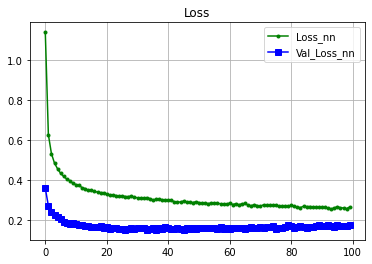

In [ ]:
plt.figure()

plt.plot(model_nn_fit.history["loss"], label="Loss_"+"nn", marker='.', color="green")
plt.plot(model_nn_fit.history["val_loss"], label="Val_Loss_"+"nn", marker="s", color="blue")

plt.grid()
plt.legend(loc="best")
plt.title("Loss")

plt.show()

## CNN

- CNNのモデルを組む
    - 2層のConv層と1層の全結合層
        - Conv1層目:
            - 出力のチャネル数（フィルターの数っぽいが、フィルターの数は「出力のチャネル数」*「インプットのチャネル数」）：32
            - フィルターのサイズ： ( 3 * 3 )
        - Conv2層目:
            - 出力のチャネル数（フィルターの数っぽいが、フィルターの数は「出力のチャネル数」*「インプットのチャネル数」）：64
            - フィルターのサイズ： ( 3 * 3 )
        - 全結合層:ニューロン数は128
        - 出力層:ニューロン数は10（10クラス分類だから）
    - 学習に関する設定
        - 損失関数：交差エントロピー（MSEでもいいけど、交差エントロピーの方が確率的勾配降下法の際に計算が楽っぽい）
        - 最適化手法：Adam
        - 評価関数：正解率

In [ ]:
model_cnn = Sequential()
model_cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.25))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(10, activation='softmax'))

In [ ]:
model_cnn.compile(
    loss="categorical_crossentropy",
    optimizer="Adam",
    metrics=['accuracy']
)

- モデルの構造を確認
    - パラメータの数は、合計で 320個 + 18496個 + 1179776個 + 1290個 = 1199882個
        - Conv1層目は、32枚の ( 3 * 3 ) のフィルターで1チャネルの画像を畳み込むから、 ( 3 * 3 ) * 1 * 32 + 32 = 320個
            - +32はバイアス
        - Conv2層目は、64枚の ( 3 * 3 ) のフィルターで32チャネルの画像を畳み込むから、 ( 3 * 3 ) * 32 * 64 + 64 = 18496個
            - +1はバイアスのニューロン
        - 全結合層は、 ( 9216 + 1) 個のニューロンと128個のニューロンの全結合だから、 ( 9216 + 1 ) * 128 = 1179776個
            - +1はバイアスのニューロン
        - 出力層は、 ( 128 + 1 ) 個のニューロンと10個のニューロンの全結合だから、 ( 128 + 1 ) * 10 = 1290個
            - +1はバイアスのニューロン

In [ ]:
print(model_cnn.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense_3 (Dense)             (None, 128)               1179776   
                                                      

- 学習（1199882個のパラメータの推定）
    - エポック数は100
    - バッチサイズは128
    - trainを train:valid=0.8:0.2 に分割

In [ ]:
%%time

epochs = 100

model_cnn_fit = model_cnn.fit(x_train, y_train,
                    batch_size=128,
                    epochs=epochs,
                    verbose=1,
                    validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 7s 17ms/step - loss: 0.2384 - accuracy: 0.9292 - val_loss: 0.0654 - val_accuracy: 0.9810
Epoch 2/100
375/375 [==============================] - 6s 17ms/step - loss: 0.1027 - accuracy: 0.9700 - val_loss: 0.0524 - val_accuracy: 0.9847
Epoch 3/100
375/375 [==============================] - 6s 17ms/step - loss: 0.0751 - accuracy: 0.9772 - val_loss: 0.0459 - val_accuracy: 0.9862
Epoch 4/100
375/375 [==============================] - 6s 16ms/step - loss: 0.0607 - accuracy: 0.9809 - val_loss: 0.0426 - val_accuracy: 0.9887
Epoch 5/100
375/375 [==============================] - 6s 17ms/step - loss: 0.0529 - accuracy: 0.9832 - val_loss: 0.0403 - val_accuracy: 0.9887
Epoch 6/100
375/375 [==============================] - 6s 17ms/step - loss: 0.0460 - accuracy: 0.9852 - val_loss: 0.0413 - val_accuracy: 0.9887
Epoch 7/100
375/375 [==============================] - 6s 16ms/step - loss: 0.0406 - accuracy: 0.9871 - val_loss: 0.0350 - val_accuracy:

- testの予測とtestの予測精度を表示

In [ ]:
score_cnn = model_cnn.evaluate(x_test, y_test, verbose=1, batch_size=128)
print('Test loss:', score_cnn[0])
print('Test accuracy:', score_cnn[1])

79/79 [==============================] - 1s 8ms/step - loss: 0.0487 - accuracy: 0.9931
Test loss: 0.048672426491975784
Test accuracy: 0.9930999875068665


- accuracyの上がり方を表示

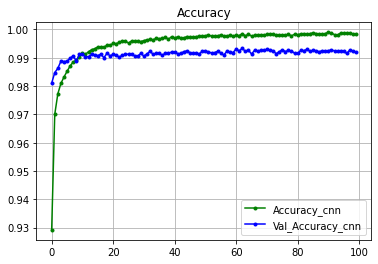

In [ ]:
plt.figure()

plt.plot(model_cnn_fit.history["accuracy"], label="Accuracy_"+ "cnn", marker=".", color="green")
plt.plot(model_cnn_fit.history["val_accuracy"], label="Val_Accuracy_"+ "cnn", marker=".", color="blue")

plt.grid()
plt.legend(loc="best")
plt.title("Accuracy")
plt.show()

- lossの下がり方を表示

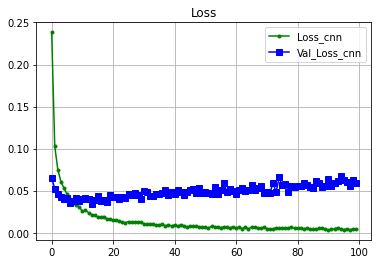

In [ ]:
plt.figure()

plt.plot(model_cnn_fit.history["loss"], label="Loss_" + "cnn", marker='.', color="green")
plt.plot(model_cnn_fit.history["val_loss"], label="Val_Loss_"+ "cnn", marker="s", color="blue")

plt.grid()
plt.legend(loc="best")
plt.title("Loss")

plt.show()

## NNをclass化

In [ ]:
class my_NN:
    def __init__(self):
        self.Epoch = 100
        self.Batch_size = 128
        self.Verbose = 1
        self.optimize = "Adam"
        self.Validation_split = 0.2                  

        self.Reshape = 28 * 28

        self.hidden_units_1 = 50
        self.hidden_units_2 = 50
        self.output_units = 10
        
        self.model = Sequential()
 
    def make_net(self):
        self.model.add(Dense(self.hidden_units_1, activation="relu", input_dim=self.Reshape))
        self.model.add(Dropout(0.5))
        self.model.add(Dense(self.hidden_units_2, activation = "relu"))
        self.model.add(Dropout(0.5))
        self.model.add(Dense(self.output_units, activation='softmax'))
 
    def model_compile(self):
        self.model.compile(loss="categorical_crossentropy",         
                           optimizer=self.optimize,         
                           metrics=["accuracy"])
 
    def make_model(self):
        self.make_net()
        self.model_compile()
 
    def train(self, x, y):
        self.model.fit(x, y, batch_size=self.Batch_size,
                       epochs=self.Epoch,
                       verbose=self.Verbose,
                       validation_split=self.Validation_split)
 
    def score(self, x, y):
        return self.model.evaluate(x, y, verbose=self.Verbose, batch_size=self.Batch_size)

In [ ]:
%%time

my_nn = my_NN()
 
my_nn.make_model()
 
my_nn.train(x_train_nn, y_train)
    
score = my_nn.score(x_test_nn, y_test)

Epoch 1/100
375/375 [==============================] - 2s 5ms/step - loss: 1.1847 - accuracy: 0.6022 - val_loss: 0.3508 - val_accuracy: 0.9113
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 0.6472 - accuracy: 0.8046 - val_loss: 0.2691 - val_accuracy: 0.9287
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 0.5427 - accuracy: 0.8369 - val_loss: 0.2410 - val_accuracy: 0.9330
Epoch 4/100
375/375 [==============================] - 2s 4ms/step - loss: 0.4977 - accuracy: 0.8544 - val_loss: 0.2188 - val_accuracy: 0.9393
Epoch 5/100
375/375 [==============================] - 2s 4ms/step - loss: 0.4636 - accuracy: 0.8662 - val_loss: 0.2112 - val_accuracy: 0.9422
Epoch 6/100
375/375 [==============================] - 2s 4ms/step - loss: 0.4432 - accuracy: 0.8695 - val_loss: 0.1986 - val_accuracy: 0.9458
Epoch 7/100
375/375 [==============================] - 2s 5ms/step - loss: 0.4178 - accuracy: 0.8786 - val_loss: 0.1933 - val_accuracy: 0.9479

In [ ]:
print("\nTest loss:", score[0])
print("\nTest accuracy:", score[1])


Test loss: 0.18143685162067413

Test accuracy: 0.9595000147819519


## CNNをclass化

In [ ]:
class my_CNN:
    def __init__(self):
        self.Epoch = 100
        self.Batch_size = 128
        self.Verbose = 1
        self.optimize = "Adam"
        self.Validation_split = 0.2                  

        self.filters_1 = 32
        self.filters_2 = 64
        self.hidden_units = 128
        self.output_units = 10
        
        self.model = Sequential()
 
    def make_net(self):
        self.model.add(Conv2D(self.filters_1, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
        self.model.add(Conv2D(self.filters_2, kernel_size=(3, 3), activation='relu'))
        self.model.add(MaxPooling2D(pool_size=(2, 2)))
        self.model.add(Dropout(0.25))
        self.model.add(Flatten())
        self.model.add(Dense(self.hidden_units, activation='relu'))
        self.model.add(Dropout(0.5))
        self.model.add(Dense(self.output_units, activation='softmax'))
 
    def model_compile(self):
        self.model.compile(loss="categorical_crossentropy",         
                           optimizer=self.optimize,         
                           metrics=["accuracy"])
 
    def make_model(self):
        self.make_net()
        self.model_compile()
 
    def train(self, x, y):
        self.model.fit(x, y, batch_size=self.Batch_size,
                       epochs=self.Epoch,
                       verbose=self.Verbose,
                       validation_split=self.Validation_split)
 
    def score(self, x, y):
        return self.model.evaluate(x, y, verbose=self.Verbose, batch_size=self.Batch_size)

In [ ]:
%%time

my_cnn = my_CNN()
 
my_cnn.make_model()
 
my_cnn.train(x_train, y_train)
    
score = my_cnn.score(x_test, y_test)

Epoch 1/100
375/375 [==============================] - 16s 22ms/step - loss: 0.2799 - accuracy: 0.9145 - val_loss: 0.0692 - val_accuracy: 0.9808
Epoch 2/100
375/375 [==============================] - 8s 21ms/step - loss: 0.0992 - accuracy: 0.9706 - val_loss: 0.0535 - val_accuracy: 0.9855
Epoch 3/100
375/375 [==============================] - 9s 23ms/step - loss: 0.0751 - accuracy: 0.9776 - val_loss: 0.0448 - val_accuracy: 0.9878
Epoch 4/100
375/375 [==============================] - 9s 23ms/step - loss: 0.0590 - accuracy: 0.9822 - val_loss: 0.0388 - val_accuracy: 0.9887
Epoch 5/100
375/375 [==============================] - 8s 21ms/step - loss: 0.0527 - accuracy: 0.9839 - val_loss: 0.0401 - val_accuracy: 0.9893
Epoch 6/100
375/375 [==============================] - 9s 23ms/step - loss: 0.0444 - accuracy: 0.9859 - val_loss: 0.0375 - val_accuracy: 0.9905
Epoch 7/100
375/375 [==============================] - 8s 21ms/step - loss: 0.0393 - accuracy: 0.9875 - val_loss: 0.0360 - val_accuracy

In [ ]:
print("\nTest loss:", score[0])
print("\nTest accuracy:", score[1])


Test loss: 0.041883859783411026

Test accuracy: 0.9940000176429749
